# BÀI TẬP 3 - ĐỘ TƯƠNG ĐỒNG CÂU (SENTENCE SIMILARITY)

## Thông tin sinh viên

|Họ tên|Mã số sinh viên|
|:--|--:|
|Nguyễn Chí Cường|1212038|
|Dương Nguyễn Anh Khoa|1312288|

## Nội dung báo cáo

### 1. Giới thiệu

Xác định độ tương đồng giữa một cặp câu là một thành phần thường không thể thiếu trong các tác vụ xử lí ngôn ngữ tự nhiên. Có thể kể đến ứng dụng của nó trong các tác vụ gom cụm câu hay tóm tắt văn bản tự động. Chính vì tính chất quan trọng của nó mà nó vẫn được nghiên cứu cải tiến cho đến ngày nay.

Trong bài tập này, sinh viên thử nghiệm mô hình word embedding trong bài toán xác định độ tương đồng giữa một cặp câu. Lí do là vì mô hình word embedding có thể biểu diễn một từ dưới dạng một vector và giữ được đặc trưng ngữ nghĩa của chúng, do đó hứa hẹn cho kết quả khả quan hơn so với các phương pháp truyền thống.

Sinh viên sử dụng 2 phương pháp sau:

- Bag-of-words (BoW) sử dụng đặc trưng TF-IDF để xác định vector của một câu.

- Word embedding để xác định vector của một từ để từ đó có thể áp dụng để xác định vector của câu bằng cách tính tổng các vector từ lại với nhau.


\* Trong đó, phương pháp BoW được sử dụng như baseline để so sánh.

Sau khi có được các vectors của câu, sinh viên sẽ sử dụng độ đo Cosine để tính độ tương đồng giữa chúng. Chi tiết về mỗi mô hình sẽ được sinh viên trình bày trong từng phần bên dưới.

## 2. Dữ liệu - Độ đo đánh giá mô hình

**Dữ liệu Stopwords:**

Sinh viên sử dụng danh sách các stopwords của ngôn ngữ English được tổng hợp từ nguồn: http://www.ranks.nl/stopwords

**Bộ trọng số được huấn luyện sẵn cho Word2Vec:**

Sinh viên sử dụng bộ trọng số  đã được huấn luyện sẵn là: GoogleNews-vectors-negative300

Bộ trọng số này được huấn luyện trên tập ngữ liệu được tổng hợp từ Google News theo phương pháp Continuous Bag of Words. Sau quá trình huấn luyện thu được bộ trọng số word embedding gồm 3 triệu từ và vector của mỗi từ có kích thước là 300 chiều.

**Tập dữ liệu đánh giá:**

Sinh viên sử dụng tập dữ liệu đánh giá SemEval 2014 bao gồm 4927 cặp câu được con người đánh điểm tương đồng trong đoạn [1.0, 5.0] với điểm càng cao thể hiện cặp câu càng tương đồng.

**Độ tương đồng Cosine dùng để tính độ tương đồng giữa 2 vectors:**

Công thức: $cos(\vec q, \vec d)= \dfrac{\vec q, \vec d}{\mid\vec q\mid \mid\vec d\mid} = \dfrac{\vec q}{\mid\vec q\mid} . \dfrac{\vec d}{\mid\vec d\mid} = \dfrac{\sum_{i=1}^{\mid v \mid} q_i d_i}{\sqrt{\sum_{i=1}^{\mid v \mid} q^2_i}  \sqrt{\sum_{i=1}^{\mid v \mid} d^2_i}}$

Độ tương đồng Cosine cho biết hướng của 2 vectors (khác 0) trong không gian.

\* Khi áp dụng trong bài toán tính độ tương đồng giữa 2 vectors câu. Miền giá trị của nó trong đoạn [0, +1] thay vì [-1, +1] bởi vì các giá trị của vector là không âm và góc giữa 2 vectors cũng không vượt quá $90^o$.

**Các độ đo đánh giá mô hình**

Trong bài tập này, sinh viên sử dụng 3 độ đo sau để đánh giá chất lượng mô hình:

** 1. Độ lỗi Mean squared error (MSE) **

Công thức: $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{Y}_i - Y_i)^2$

Độ đo MSE là hàm lỗi xác định độ sai lệch giữa điểm dự đoán và điểm được đánh giá bởi con người. Độ lỗi càng nhỏ thể hiện mô hình dự đoán càng tốt.

** 2. Độ tương quan Pearson **

Công thức: $r = \frac{\sum_{i=1}^{n}(Y_i - \overline{Y})(\hat{Y}_i - \overline{\hat{Y}})}{\sqrt{\sum_{i=1}^{n}(Y_i - \overline{Y})^2}\sqrt{\sum_{i=1}^{n}(\hat{Y}_i - \overline{\hat{Y}})^2}}$

Độ tương quan Pearson xác định mối quan hệ tuyến tính giữa 2 phân bố là điểm dự đoán và điểm được đánh giá bởi con người (cùng tăng hoặc cùng giảm bởi 1 hằng số $c$). Nó giả sử  rằng 2 phân bố trên phải giống nhau và phải là phân bố chuẩn (Gaussian). Giá trị của nó nằm trong đoạn [-1, +1] với 0 mang ý nghĩa không tương quan và gần +1 mang ý nghĩa tương quan theo chiều hướng giống nhau (ví dụ điểm đánh giá tăng thì điểm dự đoán cũng tăng).


** 3. Độ tương quan Spearman **

Công thức: $r = \frac{\sum_{i=1}^{n}Y_i\hat{Y}_i - \frac{(\sum_{i=1}^{n}Y_i)(\sum_{i=1}^{n}\hat{Y}_i)}{n}}{\sqrt{\sum_{i=1}^{n}Y_i^2 - \frac{(\sum_{i=1}^{n}Y_i)^2}{n}}\sqrt{\sum_{i=1}^{n}\hat{Y}_i^2 - \frac{(\sum_{i=1}^{n}\hat{Y}_i)^2}{n}}}$

Tương tự như độ tương quan Pearson nhưng độ tương quan Spearman không giả sử rằng 2 phân bố là phân bố chuẩn và quan hệ giữa 2 phân bố đơn điệu chứ không phải tuyến tính (không ràng buộc cùng tăng hoặc cùng giảm bởi 1 hằng số $c$). Giá trị của nó cũng nằm trong đoạn [-1, +1] với ý nghĩa tương tự như Spearman.

## 3. Code

In [1]:
%matplotlib inline
import gensim
import pickle
import sklearn
import numpy as np
import scipy.stats as meas
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Read text file line by line
def read_lines(file_name):
    lines = []
    with open(file_name, 'r', encoding='UTF-8') as f:
        for line in f:
            lines.append(line.rstrip('\r\n'))
    return lines

# Read object file
def read_obj(file_name):
    pairs = []
    scores = []
    with open(file_name, 'rb') as f:
        lines = pickle.load(f)
        for line in lines:
            pairs.append([line[0].lower(), line[1].lower()])
            scores.append(line[2])
    return pairs, scores

# Compute MSE, Pearson, and Spearman
def eval(pred, gold):
    pred = np.array(pred)
    gold = np.array(gold)
    return np.mean(np.square(pred - gold)), meas.pearsonr(pred, gold)[0], meas.spearmanr(pred, gold)[0]

In [3]:
# Load stopwords
STOPWORDS_EN = read_lines('resources/stopwords-en.txt')

# Load models
WORD2VEC_MODEL_EN = gensim.models.KeyedVectors.load_word2vec_format('resources/word2vec-en.bin', binary=True)

# Load datasets
PAIRS, SCORES = read_obj('resources/semeval2014-test.bin')

## 2. Mô hình

### 2.1. Mô hình TF-IDF (baseline)

Mô hình BoW biểu diễn câu thành những điểm trong không gian Euclid n-chiều, mỗi chiều tương ứng với một từ trong tập hợp các từ $V$. Phần tử thứ i, là $v_i$ của vector câu cho biết số lần mà từ thứ i xuất hiện trong câu. Sự tương đồng của hai câu được định nghĩa là khoảng cách giữa các điểm (khoảng cách Euclidean), hoặc là góc giữa những vector trong không gian (độ đo Cosine).

Mỗi từ trong không gian vector sẽ có một trọng số, có nhiều phương pháp xếp hạng khác nhau, nhưng TF-IDF (term frequency–inverse document frequency) là một phương pháp phổ biến để đánh giá và xếp hạng một từ trong một tài liệu và do đó được sinh viên sử dụng làm baseline trong bài tập này.

Cách tính trọng số TF-IDF:

**TF (term frequency)** là tần số xuất hiện của 1 từ trong 1 câu:

Công thức: $\mathrm{tf}(t, d) = \frac{\mathrm{f}(t,d)}{\max\{\mathrm{f}(w, d) : w\in d\}}$

Trong đó:

- Thương của số lần xuất hiện 1 từ trong câu và số lần xuất hiện nhiều nhất của một từ bất kỳ trong câu đó. (giá trị sẽ thuộc đoạn [0, 1])

- $\mathrm{f}(t,d)$: số lần xuất hiện từ t trong câu d.

- $\max\{\mathrm{f}(w, d) : w\in d\}$: số lần xuất hiện nhiều nhất của một từ bất kì trong câu.

**IDF (inverse document frequency)** là tần số nghịch của 1 từ trong tập các câu.

Do nếu chỉ tính trọng số TF thì các từ có tần số xuất hiện nhiều sẽ có trọng số  rất cao. Nhưng nhìn chung thì các từ xuất hiện nhiều lần thường mang ít ý nghĩa hơn (stopwords chẳng hạn). Do đó, cần xác định thêm trọng số IDF để giảm giá trị của những từ phổ biến. Mỗi từ chỉ có 1 giá trị IDF duy nhất trong tập các câu.

Công thức: $\mathrm {idf} (t,D)=\log{\frac{|D|}{|\{d\in D:t\in d\}|}}$

- $|D|$: tổng số câu trong tập D.

- $|\{d\in D:t\in d\}|$: số văn bản chứa từ nhất định, với điều kiện $t$ xuất hiện trong câu $d$. Nếu từ đó không xuất hiện ở bất cứ câu nào trong tập thì mẫu số sẽ bằng 0 nên phép chia sẽ không hợp lệ, vì thế mẫu thường được thay bằng $1+|\{d\in D:t\in d\}|$.

Cơ số logarit trong công thức này không làm thay đổi giá trị của 1 từ mà chỉ thu hẹp khoảng giá trị của từ đó. Việc thay đổi khoảng giá trị sẽ giúp tỉ lệ giữa TF và IDF tương đồng để  xác định giá trị TF-IDF.

**TF-IDF:**

Công thức: $\mathrm{tfidf} (t,d,D)=\mathrm{tf} (t,d)\times \mathrm{idf}(t,D)$

Những từ có giá trị TF-IDF cao là những từ xuất hiện nhiều trong câu này, và xuất hiện ít trong các câu khác. Việc này giúp lọc ra những từ phổ biến và giữ lại những từ có giá trị cao (từ khoá của câu).

In [4]:
def sensim_tfidf(pair):
    vectorizer = TfidfVectorizer(min_df=0, stop_words=STOPWORDS_EN)
    matrix = vectorizer.fit_transform(pair)
    return cosine_similarity(matrix, matrix)[0][1]

In [5]:
pred_scores_tfidf = []
for pair in PAIRS:
    score = sensim_tfidf(pair) * 4.0 + 1.0
    pred_scores_tfidf.append(score)

Đánh giá mô hình sử dụng BoW + đặc trưng TF-IDF

In [6]:
scores_tfidf = eval(pred_scores_tfidf, SCORES)
print('MSE: %f, Pearson: %f, Spearman: %f' % scores_tfidf)

MSE: 1.634234, Pearson: 0.555282, Spearman: 0.548361


### 2.2. Mô hình Word Embedding

Qua mô hình BoW + TF-IDF, sinh viên nhận thấy rằng mô hình trên không thể lưu giữ được các đặc trưng về ngữ nghĩa của từ hoặc câu. Trong khi đó, việc xác định thông tin ngữ nghĩa đóng vai trò rất quan trọng trong bài toán xác định độ tương đồng giữa cặp câu.

Ví dụ sau sẽ cho thấy rằng mô hình BoW + TF-IDF không hiệu quả:

Câu 1: Obama speaks to the media in Illinois

Câu 2: The president greets the press in Chicago

Sau khi xóa stopwords:

Câu 1: Obama speaks media Illinois

Câu 2: president greets press Chicago

Có thể thấy rằng, cả 2 câu hoàn toàn giống nhau về mặt ngữ nghĩa. Nhưng nếu tính độ tương động giữa 2 vectors của câu đó được biểu diễn bằng BoW + TF-IDF sẽ ra giá trị 0. Bởi vì giữa 2 câu đó không có từ chung nào cả (common words).

Qua ví dụ trên, sinh viên tiếp tục tìm hiểu về mô hình Word embedding để biểu diễn vector tốt hơn.

Mô hình Word embedding biểu diễn các từ dưới dạng một phân bố quan hệ với các từ còn lại (distributed representation). Giả sử rằng có một vector có số chiều d = 300. Khi đó, mỗi từ được biểu diễn bằng một vector có các phần tử mang giá trị là phân bố quan hệ của từ này đối với các từ khác trong từ điển $V$.

![Ảnh minh họa](https://ongxuanhong.files.wordpress.com/2016/10/word2vec-distributed-representation.png)

Ảnh minh họa sau cho thấy được mối quan hệ giữa các vectors của từ trong không gian vector.

![Ảnh minh họa](https://ongxuanhong.files.wordpress.com/2016/10/word2vec-gender-relation.png)

Khi đó, có thể thấy được rằng vec("king") + vec("woman") - vec("man") ~ vec("queen") (code minh họa bên dưới).

Trong bài tập này, để đơn giản sinh viên sẽ sử dụng mô hình Word2Vec Continuous Bag-of-Words để học cách biểu diễn vector của từ.

![Word2vec model](http://blog.christianperone.com/wp-content/uploads/2016/01/softmax-nplm.png)

Mô hình này sử dụng một sliding window kích thước k để trượt qua đoạn văn bản để học. Trong đó, từ trung tâm sẽ là từ dùng để dự đoán (đầu ra) và k từ bên trái và k từ bên phải sẽ là các từ ngữ cảnh, đóng vai trò là đầu vào của mô hình. Mô hình sẽ cố gắng cực đại hóa xác suất có điều kiện để quan sát được từ trung tâm khi biết thông tin các từ ngữ cảnh.

![image.png](https://ongxuanhong.files.wordpress.com/2016/10/word2vec-context-words.png)

Cuối cùng, bộ trọng số liên kết giữa Projection layer và Hidden layer sẽ được lưu trữ lại. Có thể hiểu nó là Word embedding chứa tập các vector d chiều của bộ từ điển $V$.

## Trực quan hóa không gian word vector

In [7]:
def visualize_word2vec(num_samples=300, num_colors=50):
    # Random num_colors hls colors
    palette = np.array(sns.color_palette("hls", num_colors))
    colors = np.random.choice(num_colors, num_samples)
    # Random words in vocab
    words = np.random.choice(WORD2VEC_MODEL_EN.index2word, size=num_samples, replace=False)
    vectors = vectors = [WORD2VEC_MODEL_EN[word] for word in words]
    # Train t-SNE
    tsne = TSNE(n_components=2, random_state=0)
    Y = tsne.fit_transform(vectors)
    # Plot data
    plt.figure(figsize=(20, 20))
    plt.scatter(Y[:, 0], Y[:, 1], c=palette[colors])
    for i, (pos, word) in enumerate(zip(Y, words)):
        plt.annotate(word, xy=(pos[0], pos[1]), xytext=(6, -2), textcoords='offset points', color=palette[colors[i]])
    plt.show()

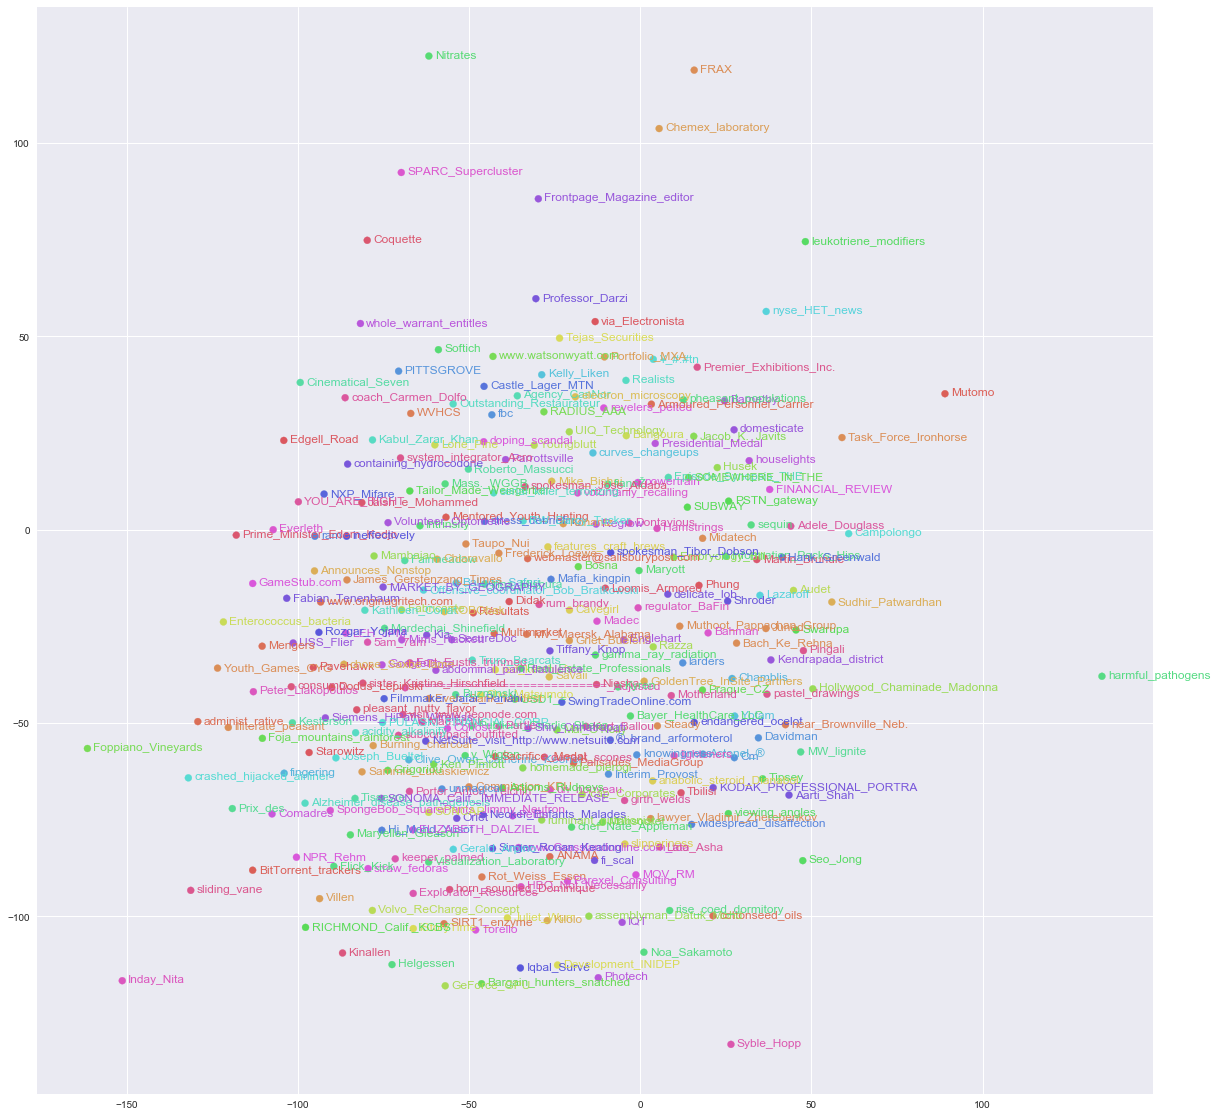

In [8]:
visualize_word2vec()

In [9]:
def sensim_word2vec(pair):
    d1, d2 = pair

    if d1 == d2:
        return 1.0

    s1_tokens = d1.split(' ')
    s2_tokens = d2.split(' ')
    s1_filtered_tokens = set(s1_tokens)
    s2_filtered_tokens = set(s2_tokens)

    s1_invalid_tokens = []
    for token in s1_filtered_tokens:
        if token not in WORD2VEC_MODEL_EN.vocab or token in STOPWORDS_EN:
            s1_invalid_tokens.append(token)

    s1_tokens = list(filter(lambda x: x not in s1_invalid_tokens, s1_tokens))

    s2_invalid_tokens = []
    for token in s2_filtered_tokens:
        if token not in WORD2VEC_MODEL_EN.vocab or token in STOPWORDS_EN:
            s2_invalid_tokens.append(token)

    s2_tokens = list(filter(lambda x: x not in s2_invalid_tokens, s2_tokens))

    # No words
    if len(s1_tokens) == 0 or len(s2_tokens) == 0:
        return 0.0

    return WORD2VEC_MODEL_EN.n_similarity(s1_tokens, s2_tokens)

Thử nghiệm với bài toán kinh điển: vec("king") + vec("woman") - vec("man") liệu có bằng vec("queen")

In [12]:
WORD2VEC_MODEL_EN.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.711819589138031),
 ('monarch', 0.6189677119255066),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499463081359863),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181135535240173),
 ('sultan', 0.5098592042922974),
 ('monarchy', 0.5087411999702454)]

Nhận thấy rằng từ đầu tiên với độ tương đồng cao nhất là queen. Điều này cho thấy rằng mô hình Word embedding biểu diễn các vector của từ kèm theo thông tin về ngữ nghĩa của chúng.

In [10]:
pred_scores_word2vec = []
for pair in PAIRS:
    score = sensim_word2vec(pair) * 4.0 + 1.0
    pred_scores_word2vec.append(score)

Đánh giá mô hình Word2vec

In [11]:
scores_word2vec = eval(pred_scores_word2vec, SCORES)
print('MSE: %f, Pearson: %f, Spearman: %f' % scores_word2vec)

MSE: 0.916337, Pearson: 0.693805, Spearman: 0.560185


## 6. So sánh - Thảo luận

In [13]:
def draw_chart():
    # configs
    labels = ['MSE', 'Pearson', 'Spearman']
    colors = np.array(sns.color_palette("hls", 2))
    n_groups = len(labels)
    indices = np.arange(n_groups)
    bar_width = 0.2
    
    # Create plot
    plt.figure(figsize=(15, 8))
    rects1 = plt.bar(indices, scores_tfidf, bar_width, color=colors[0], label='TF-IDF')
    rects2 = plt.bar(indices + bar_width, scores_word2vec, bar_width, color=colors[1], label='Word2Vec')
    plt.xticks(indices + bar_width / 2, labels)
    plt.title('Comparison')
    plt.ylabel('Scores')
    plt.legend()
    plt.show()

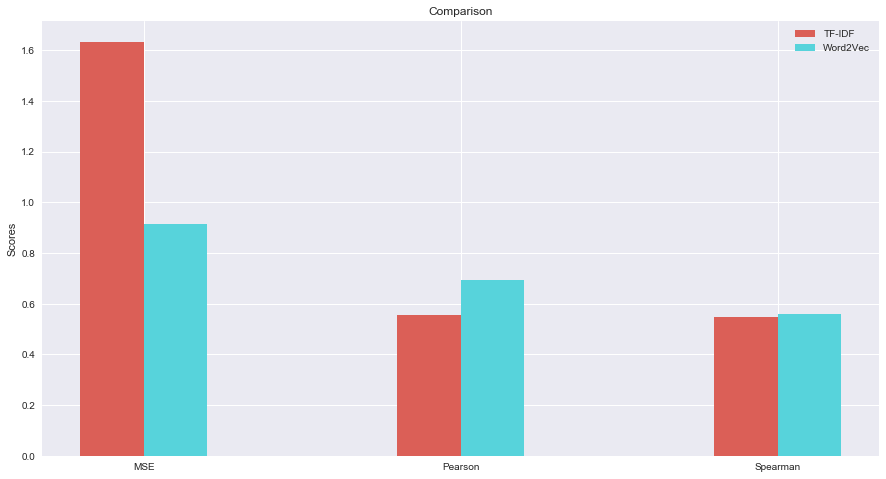

In [14]:
draw_chart()

Qua quá trình thực nghiệm, có thể thấy rằng điểm của mô hình Word2vec luôn nhỉnh hơn mô hình BoW sử dụng TF-IDF ở cả 3 độ đo MSE, Pearson và Spearman.

Độ lỗi MSE của mô hình BoW TF-IDF xấp xỉ 1.63, điều này cho thấy rằng phương pháp này không quá tệ khi áp dụng trong bài toán xác định độ tương đồng giữa cặp câu. Tuy nhiên, với mô hình Word2vec thì độ lỗi có thể giảm thêm gấp 2 lần và cho xấp xỉ 0.91. Kết quả này cho thấy rằng thông tin ngữ nghĩa đóng vai trò quan trọng trong việc xác định độ tương đồng giữa cặp câu.

Bên cạnh đó, độ tương quan Pearson và Spearman của Word2vec cũng nhỉnh hơn BoW + TF-IDF. Theo như những mô tả về cả hai độ đo tương quan ở phần trên thì kết quả cho thấy được sự hiệu quả của mô hình Word2vec.

**Tóm lại:**

BoW + TF-IDF:

- Ưu điểm:

    - Tính toán đơn giản.
    
    - Thể hiện được một số đặc trưng trong câu (tần xuất xuất hiện của từ khóa trong câu).


- Nhược điểm:

    - Số chiều của vector câu rất lớn (phụ thuộc vào kích thước bộ từ điển $V$).
    
    - Giá trị của vector rời rạc.

    - Không thể lưu trữ thông tin ngữ nghĩa của câu.
    
    - Không thể lưu trữ thông tin vị trí của các từ trong câu.


Word2vec:

- Ưu điểm:

    - Số chiều của vector nhỏ, giá trị liên tục.

    - Lưu trữ thông tin ngữ nghĩa của từ.
    
    - Phương pháp học không giám sát nên không cần dữ liệu gán nhãn.


- Nhược điểm:

    - Do vector của câu được xác định bằng tổng các vector từ nên ít nhiều sẽ bị mất mát thông tin và vị trí của từ.